# Charge mutations

## Format the data appropriately for arsenic

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [3]:
title_pairs = [["D35A", "A35D"], ["D39A", "A39D"], ["E76A", "A76E"], ["E80A", "A80E"], ["K27A", "A27K"], ["R59A", "A59R"], ["R83Q", "Q83R"], ["R87A", "A87R"]]
dir_num = 13
# subdirs = [48, 77, 52, 54, 87, 111, 60, 85]
subdirs = [48, 93, 52, 54, 87, 81, 60, 85]

# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    print(f"loading {i}")
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
            binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
    to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

loading 0
loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7


In [4]:
to_plot

[['D35', 'A35', 3.3361230126522723, 0.251178626766434, 0.7054767974544416],
 ['A35', 'D35', -3.7979182701636978, 0.2858335678295301, 0.6565747899470384],
 ['D39', 'A39', 11.640782793425467, 0.49362177719391565, 1.2342624500635235],
 ['A39', 'D39', -10.68945154912351, 0.5279329060680924, 0.9403447738741448],
 ['E76', 'A76', 1.559170413830258, 0.11075514317631868, 0.19286311574620485],
 ['A76', 'E76', -1.6660092807002005, 0.12398689413248688, 0.24645621585027389],
 ['E80', 'A80', 0.10775836885481871, 0.12852819478369662, 0.24395299839794604],
 ['A80', 'E80', -0.11109197797905189, 0.10625663524533774, 0.2285969187674574],
 ['K27', 'A27', 6.022676839739163, 0.438129026273587, 1.2639995026975326],
 ['A27', 'K27', -6.922387947121931, 0.40903266753179873, 0.5861298326073276],
 ['R59', 'A59', 1.6480031743459456, 0.12889994235653535, 0.29776691095748675],
 ['A59', 'R59', -5.051492580233704, 0.2626751246310523, 0.5441072255488111],
 ['R83', 'Q83', 12.508175497970063, 0.6423395077886132, 2.377263

In [5]:
d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5}

In [6]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['K27', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['R59', d['WT']*-1, 0])
        experiment.append(['R83', d['WT']*-1, 0])
        experiment.append(['R87', d['WT']*-1, 0])
        experiment.append(['D35', d['WT']*-1, 0])
        experiment.append(['D39', d['WT']*-1, 0])
        experiment.append(['E76', d['WT']*-1, 0])
        experiment.append(['E80', d['WT']*-1, 0])
    else:
        experiment.append([k, d[k]*-1, 0])

In [7]:
experiment

[['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0]]

In [8]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_charge_optimized.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [10]:
experiment + to_plot

[['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0],
 ['D35', 'A35', 3.3361230126522723, 0.251178626766434, 0.7054767974544416],
 ['A35', 'D35', -3.7979182701636978, 0.2858335678295301, 0.6565747899470384],
 ['D39', 'A39', 9.483180161149908, 0.6647554855598119, 1.003642256508014],
 ['A39', 'D39', -9.909469901434738, 0.3835075155786505, 0.5505371741862408],
 ['E76', 'A76', 1.559170413830258, 0.11075514317631868, 0.19286311574620485],
 ['A76', 'E76', -1.6660092807002005, 0.12398689413248688, 0.24645621585027389],
 ['E80', 'A80', 0.10775836885481871, 0.12852819478369662, 0.24395299839794604],
 ['A80', 'E80', -0.11109197797905189, 0.10625663524533774, 0.2285969187674574],
 ['K27', 'A27', 6.022676839739163, 0.438129026273587, 1

## Make arsenic plot

In [16]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [17]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge_optimized.csv')

Graph is not connected enough to compute absolute values


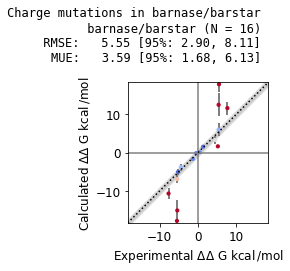

In [18]:
plotting.plot_DDGs(fe.graph,target_name='barnase/barstar', title='Charge mutations in barnase/barstar', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_charge_optimized.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version

# Make combined

## Format the data appropriately for arsenic

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_binding_ddgs(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5

In [19]:
title_pairs = [["T42A", "A42T"], ["Y29A", "A29Y"], ["W38F", "F38W"], ["W44F", "F44W"], ["Y29F", "F29Y"]] + [["D35A", "A35D"], ["D39A", "A39D"], ["E76A", "A76E"], ["E80A", "A80E"], ["K27A", "A27K"], ["R59A", "A59R"], ["R83Q", "Q83R"], ["R87A", "A87R"]]
dir_num = 13
subdirs = [6, 40, 42, 44, 46] + [48, 93, 52, 54, 87, 81, 60, 85]

# to_plot = ['# Calculated block', '# Mutant1, Mutant2, calc_DDG, calc_dDDG(BAR), calc_dDDG(additional)']
to_plot = []
for i, subdir in enumerate(subdirs):
    print(f"loading {i}")
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/dgs_phase.pickle", "rb") as f:
        dgs_phase = pickle.load(f)
        
        # Compute binding ddgs from BAR
        binding_ddgs_forward = []
        binding_ddgs_backward = []
        for j in range(len(dgs_phase)):
            binding_ddgs_forward.append(compute_binding_ddgs(dgs_phase[subdir][j]['apo'][1], dgs_phase[subdir][j]['complex'][1]))
            binding_ddgs_backward.append(compute_binding_ddgs(dgs_phase[subdir+1][j]['apo'][1], dgs_phase[subdir+1][j]['complex'][1]))

    to_plot.append([title_pairs[i][0][:-1], title_pairs[i][0][-1] + title_pairs[i][0][1:3], np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(binding_ddgs_forward)*KT_KCALMOL, abs(np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL)])
    to_plot.append([title_pairs[i][1][:-1], title_pairs[i][1][-1] + title_pairs[i][1][1:3], np.mean(ddgs[subdir+1])*KT_KCALMOL, np.mean(binding_ddgs_backward)*KT_KCALMOL, abs(np.mean(ddgs[subdir+1])*KT_KCALMOL - np.percentile(ddgs[subdir+1], 2.5)*KT_KCALMOL)]) # take the negative of these so they match the forward transform values
        
        
        

loading 0
loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7
loading 8
loading 9
loading 10
loading 11
loading 12


In [20]:
to_plot

[['T42', 'A42', 2.4775736774625106, 0.14492823192572338, 0.29206655901304357],
 ['A42', 'T42', -2.590317634725722, 0.1387902887463084, 0.2906048518893245],
 ['Y29', 'A29', 3.2135658869309403, 0.26295875875044394, 0.3741518275551283],
 ['A29', 'Y29', -3.410853432180609, 0.28930036438288387, 0.46648340240812924],
 ['W38', 'F38', 0.7125039103042382, 0.20221595299471318, 0.46123576363406604],
 ['F38', 'W38', -0.9759662823876831, 0.15341288497910646, 0.3381558229628292],
 ['W44', 'F44', 0.7481621264382506, 0.19140728919281358, 0.34685330514067536],
 ['F44', 'W44', -1.017484686587127, 0.17805351350430415, 0.30790942608488026],
 ['Y29', 'F29', 0.945489267336097, 0.04849480281589095, 0.09933728706953215],
 ['F29', 'Y29', -1.0369962276372082, 0.05394158723693792, 0.11880044657317268],
 ['D35', 'A35', 3.3361230126522723, 0.251178626766434, 0.7054767974544416],
 ['A35', 'D35', -3.7979182701636978, 0.2858335678295301, 0.6565747899470384],
 ['D39', 'A39', 11.640782793425467, 0.49362177719391565, 1.

In [22]:
d = {'WT': 19.0, 'F29': 19.1, 'A29': 15.6, 'F38': 17.4, 'A42': 17.2, 'F44': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5}

In [23]:
# experiment = ['# Experiment block', '# Mutant, expt_DDG, expt_dDDG']
experiment = []
for k in d.keys():
    if k == 'WT':
        experiment.append(['T42', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['Y29', d['WT']*-1, 0])
        experiment.append(['W38', d['WT']*-1, 0])
        experiment.append(['W44', d['WT']*-1, 0])
        experiment.append(['Y29', d['WT']*-1, 0])
        experiment.append(['K27', d['WT']*-1, 0]) # take the negative of everything bc i think hannah subtracts differently
        experiment.append(['R59', d['WT']*-1, 0])
        experiment.append(['R83', d['WT']*-1, 0])
        experiment.append(['R87', d['WT']*-1, 0])
        experiment.append(['D35', d['WT']*-1, 0])
        experiment.append(['D39', d['WT']*-1, 0])
        experiment.append(['E76', d['WT']*-1, 0])
        experiment.append(['E80', d['WT']*-1, 0])
    else:
        experiment.append([k, d[k]*-1, 0])

In [24]:
experiment

[['T42', -19.0, 0],
 ['Y29', -19.0, 0],
 ['W38', -19.0, 0],
 ['W44', -19.0, 0],
 ['Y29', -19.0, 0],
 ['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['F29', -19.1, 0],
 ['A29', -15.6, 0],
 ['F38', -17.4, 0],
 ['A42', -17.2, 0],
 ['F44', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0]]

In [25]:
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/arsenic_input_combined.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [26]:
experiment + to_plot

[['T42', -19.0, 0],
 ['Y29', -19.0, 0],
 ['W38', -19.0, 0],
 ['W44', -19.0, 0],
 ['Y29', -19.0, 0],
 ['K27', -19.0, 0],
 ['R59', -19.0, 0],
 ['R83', -19.0, 0],
 ['R87', -19.0, 0],
 ['D35', -19.0, 0],
 ['D39', -19.0, 0],
 ['E76', -19.0, 0],
 ['E80', -19.0, 0],
 ['F29', -19.1, 0],
 ['A29', -15.6, 0],
 ['F38', -17.4, 0],
 ['A42', -17.2, 0],
 ['F44', -19.0, 0],
 ['A27', -13.6, 0],
 ['A59', -13.8, 0],
 ['Q83', -13.6, 0],
 ['A87', -13.5, 0],
 ['A35', -14.5, 0],
 ['A39', -11.3, 0],
 ['A76', -17.65, 0],
 ['A80', -18.5, 0],
 ['T42', 'A42', 2.4775736774625106, 0.14492823192572338, 0.29206655901304357],
 ['A42', 'T42', -2.590317634725722, 0.1387902887463084, 0.2906048518893245],
 ['Y29', 'A29', 3.2135658869309403, 0.26295875875044394, 0.3741518275551283],
 ['A29', 'Y29', -3.410853432180609, 0.28930036438288387, 0.46648340240812924],
 ['W38', 'F38', 0.7125039103042382, 0.20221595299471318, 0.46123576363406604],
 ['F38', 'W38', -0.9759662823876831, 0.15341288497910646, 0.3381558229628292],
 ['W44',

## Make arsenic plot

In [27]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from arsenic import plotting, stats, wrangle

In [28]:
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_combined.csv')

Graph is not connected enough to compute absolute values


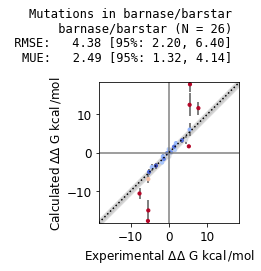

In [29]:
plotting.plot_DDGs(fe.graph,target_name='barnase/barstar', title='Mutations in barnase/barstar', units=r'$\mathrm{kcal\,/mol}$', filename='/data/chodera/zhangi/perses_benchmark/neq/13/arsenic_input_combined.png')
# added dpi to savefig() in local version
# removed "/" in labels in local version